<a href="https://colab.research.google.com/github/Santiann/Trabalho-Final-Previs-o-de-pre-o-de-voo/blob/main/Previs%C3%A3o_de_pre%C3%A7o_de_voo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import os

# Define o dataset e o destino do download
dataset = "shubhambathwal/flight-price-prediction"
download_path = "datasets/"

# Comando para baixar o dataset
os.system(f"kaggle datasets download -d {dataset} -p {download_path} --unzip")

print(f"Dataset baixado e extraído em: {download_path}")

Dataset baixado e extraído em: datasets/


In [47]:
# Importando todas as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [48]:
# Vamos ver o que há nos dados
df=pd.read_csv('/content/datasets/Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [49]:
# Eliminando a coluna inútil 'Unnamed: 0'
df=df.drop('Unnamed: 0',axis=1)

In [50]:
# Uma informação rápida sobre os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [51]:
# Descrição Estatística dos Dados
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [52]:
# Seleciona apenas colunas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Calcula a correlação e transposta
correlation_matrix = df_numeric.corr().T

print(correlation_matrix)

           duration  days_left     price
duration   1.000000  -0.039157  0.204222
days_left -0.039157   1.000000 -0.091949
price      0.204222  -0.091949  1.000000


In [53]:
# Tamanho dos dados
df.shape

(300153, 11)

In [54]:
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

,count
airline,
Indigo,704
Air_India,218
GO_FIRST,205
SpiceJet,186
Vistara,133
AirAsia,115


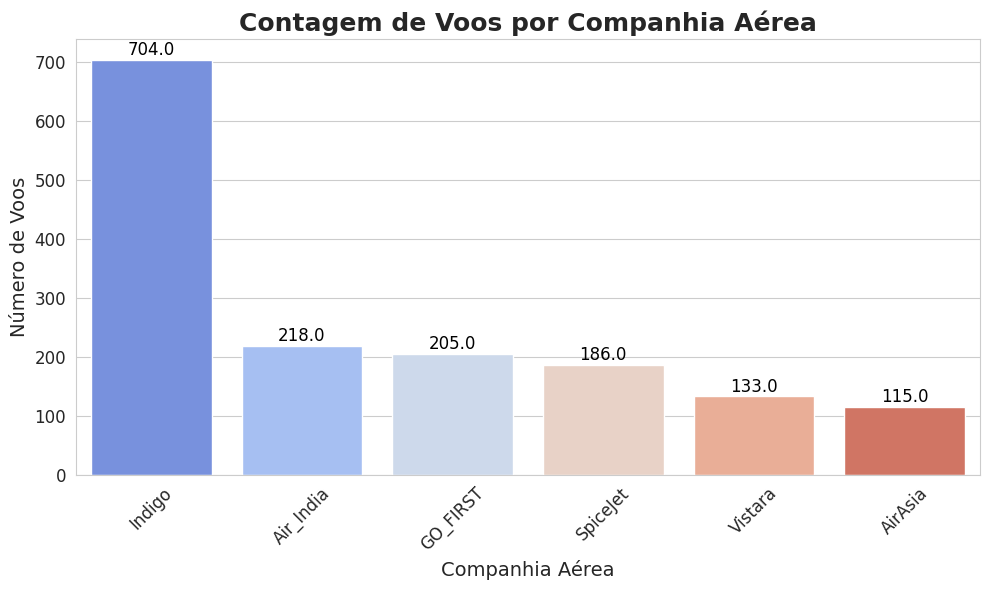

In [55]:
# Configurando o estilo e ajustando o tamanho da figura
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Criando o gráfico com uma paleta mais vibrante
palette = sns.color_palette("coolwarm", len(df1['airline'].unique()))
ax = sns.countplot(data=df1, x='airline', palette=palette, order=df1['airline'].value_counts().index)

# Adicionando rótulos de valores nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 7), textcoords='offset points')

# Melhorando os títulos e rótulos
plt.title('Contagem de Voos por Companhia Aérea', fontsize=18, fontweight='bold')
plt.xlabel('Companhia Aérea', fontsize=14)
plt.ylabel('Número de Voos', fontsize=14)

# Girando os rótulos no eixo X (caso necessário)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

In [56]:
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

,count
class,
Economy,1560
Business,295


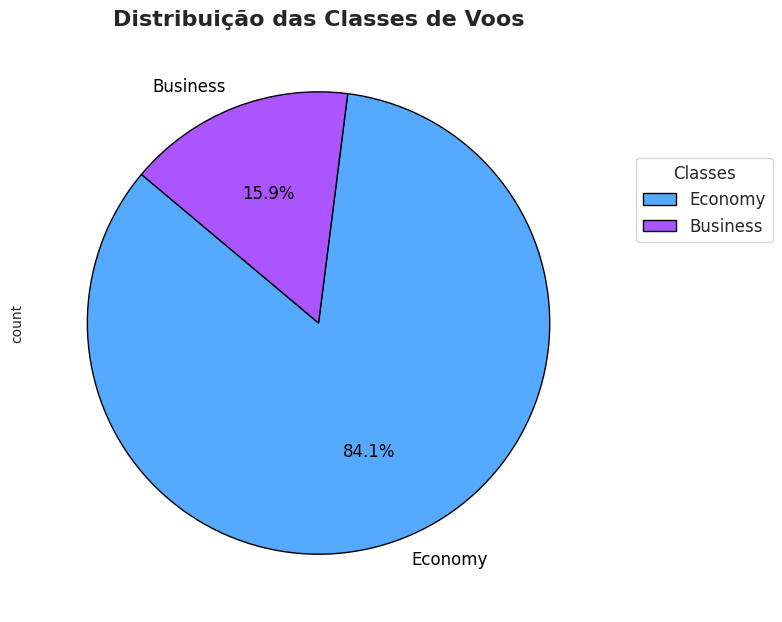

In [57]:
# Configurando o tamanho da figura
plt.figure(figsize=(8, 8))

# Criando o gráfico de pizza com melhorias
colors = sns.color_palette("cool", len(df2['class'].unique()))  # Paleta de cores
df2['class'].value_counts().plot(
    kind='pie',
    textprops={'color': 'black', 'fontsize': 12},
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)

# Adicionando título
plt.title('Distribuição das Classes de Voos', fontsize=16, fontweight='bold')

# Melhorando a legenda
plt.legend(
    labels=df2['class'].value_counts().index,
    title='Classes',
    title_fontsize=12,
    loc='upper right',
    fontsize=12,
    frameon=True,
    bbox_to_anchor=(1.3, 0.8)
)

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibindo o gráfico
plt.show()

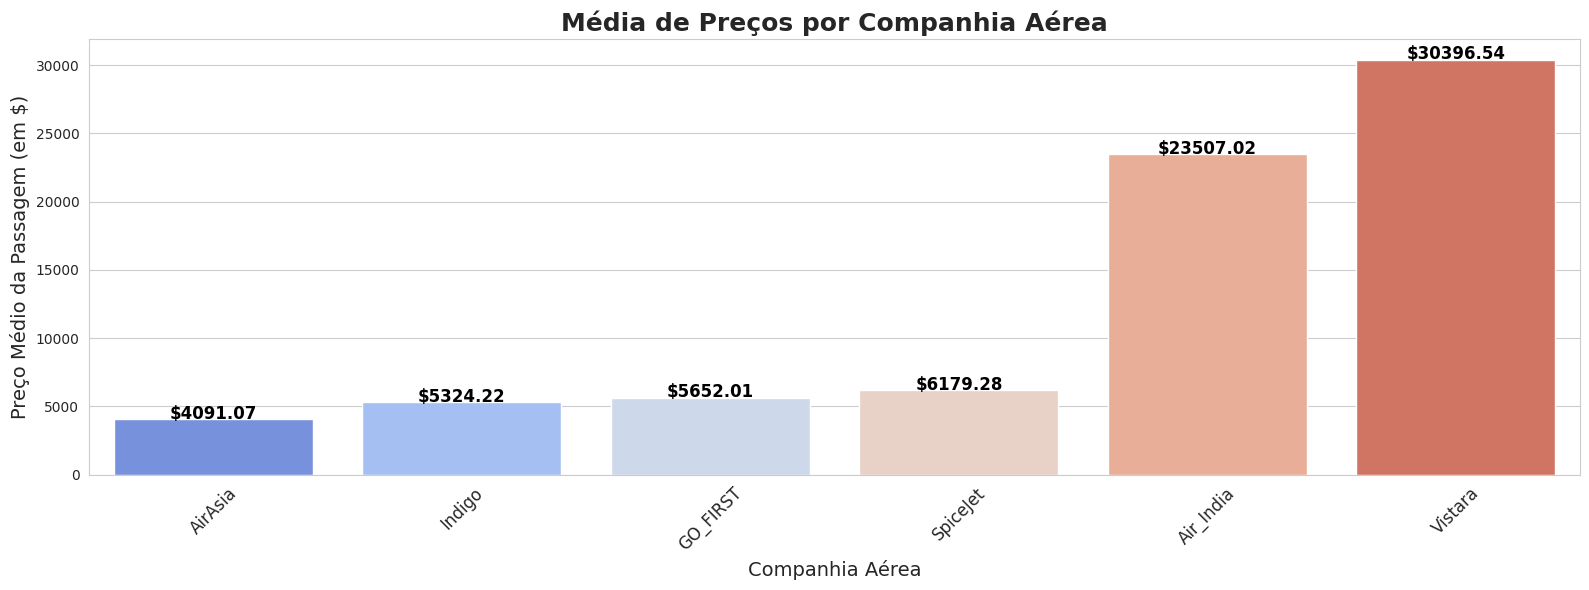

In [58]:
# Calculando a média dos preços por companhia
mean_prices = df.groupby('airline')['price'].mean().sort_values()

# Configurando o estilo e tamanho do gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(16, 6))

# Criando o gráfico de barras
sns.barplot(
    x=mean_prices.index,
    y=mean_prices.values,
    palette='coolwarm'
)

# Adicionando rótulos de valores acima das barras
for i, val in enumerate(mean_prices.values):
    plt.text(i, val + 10, f'${val:.2f}', ha='center', fontsize=12, color='black', weight='bold')

# Ajustando títulos e rótulos
plt.title('Média de Preços por Companhia Aérea', fontsize=18, fontweight='bold')
plt.xlabel('Companhia Aérea', fontsize=14)
plt.ylabel('Preço Médio da Passagem (em $)', fontsize=14)

# Ajustando rótulos do eixo X
plt.xticks(rotation=45, fontsize=12)

# Ajustando espaçamento
plt.tight_layout()

# Exibindo o gráfico
plt.show()

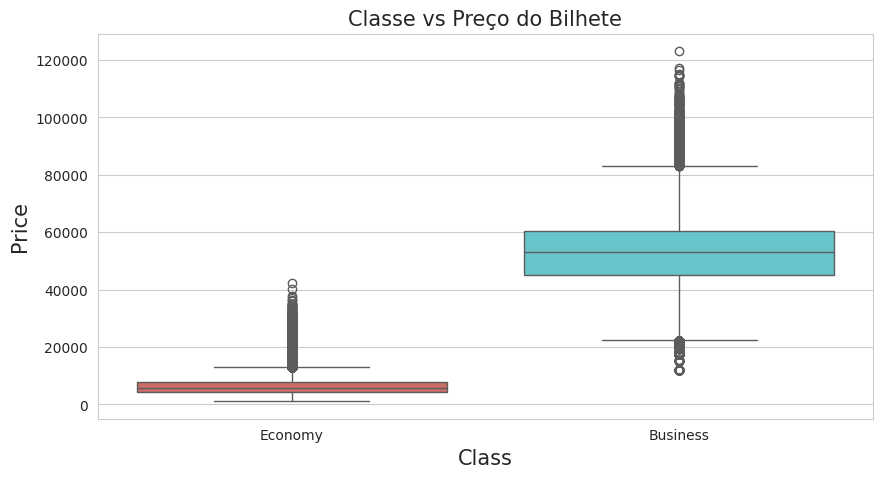

In [59]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=df,palette='hls')
plt.title('Classe vs Preço do Bilhete',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

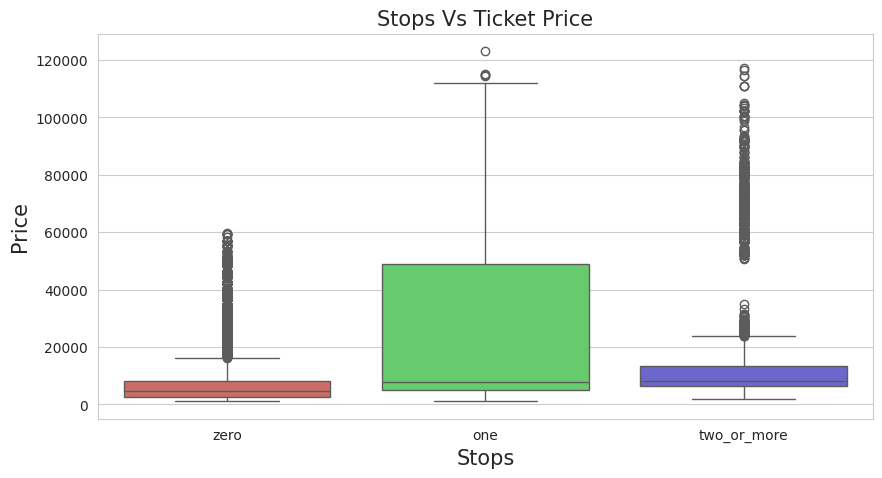

In [60]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=df,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

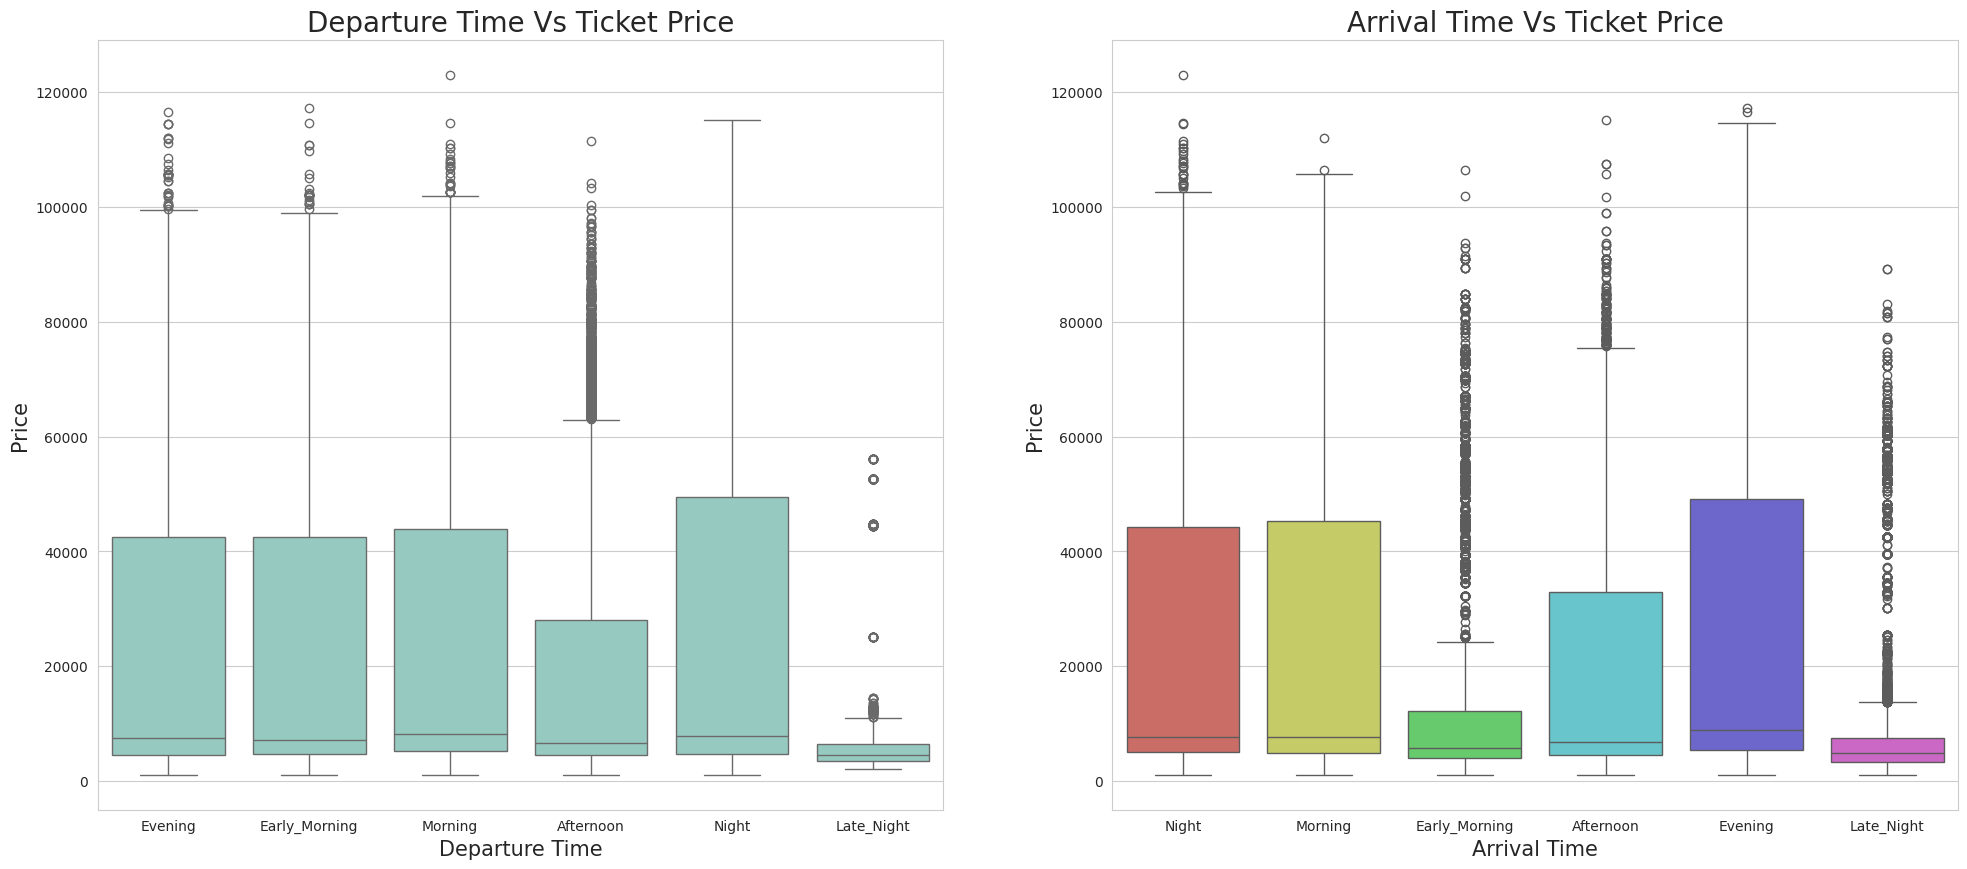

In [61]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

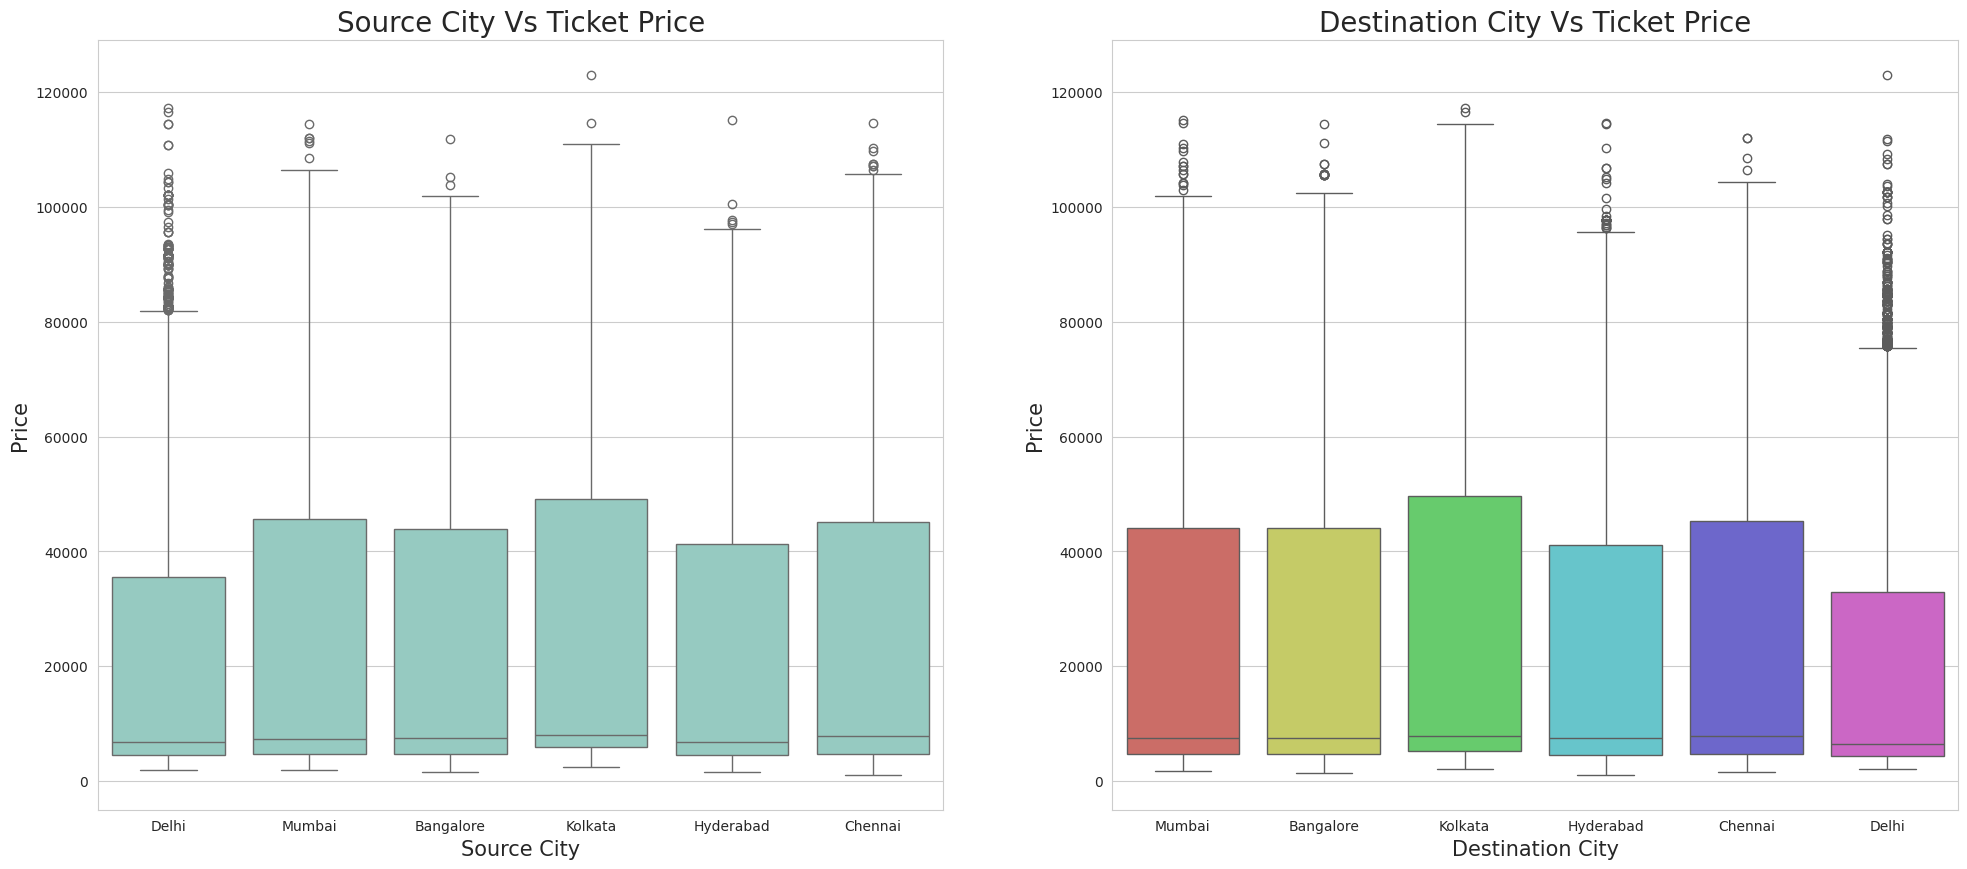

In [62]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=df)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=df,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

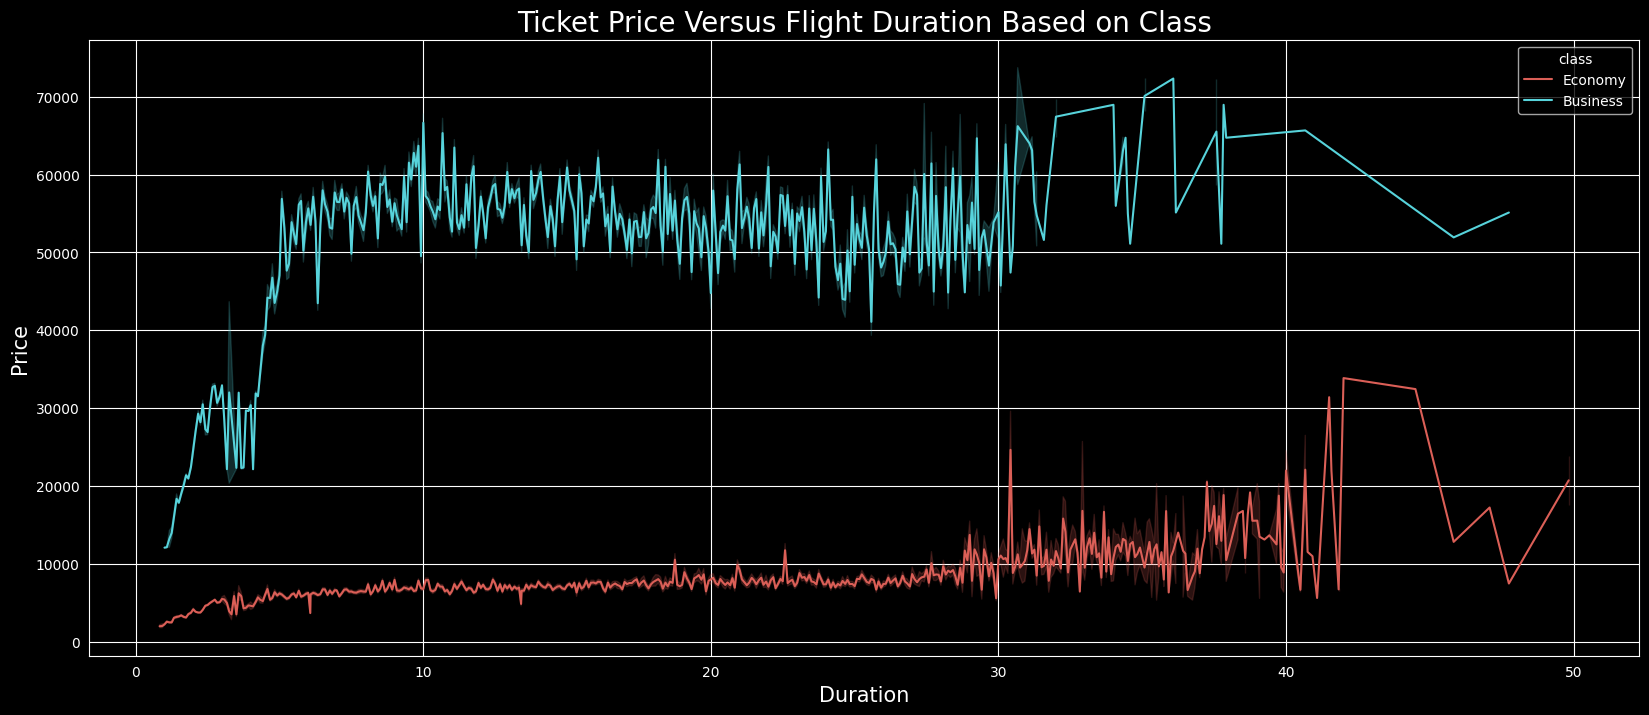

In [63]:
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration',y='price',hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

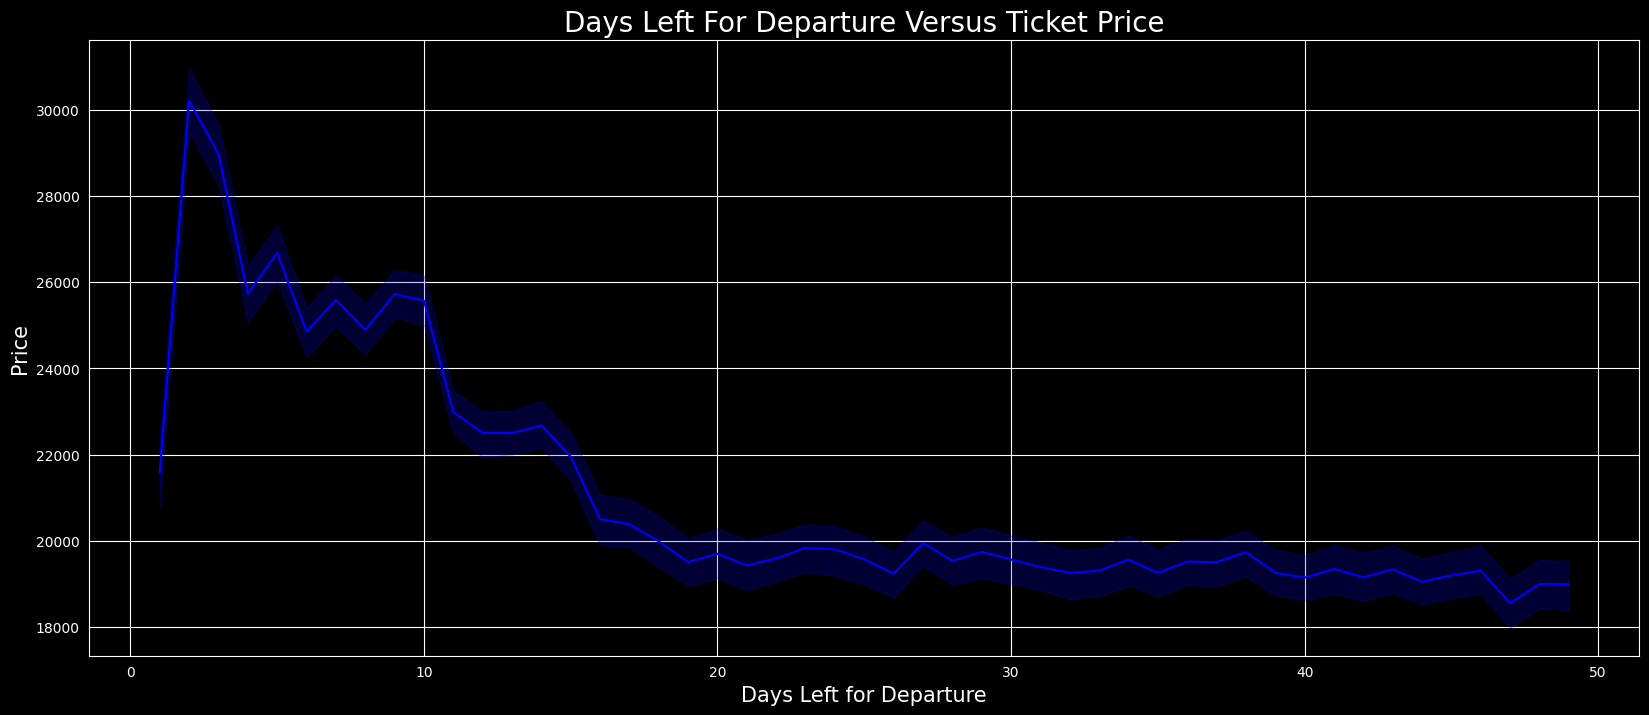

In [64]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

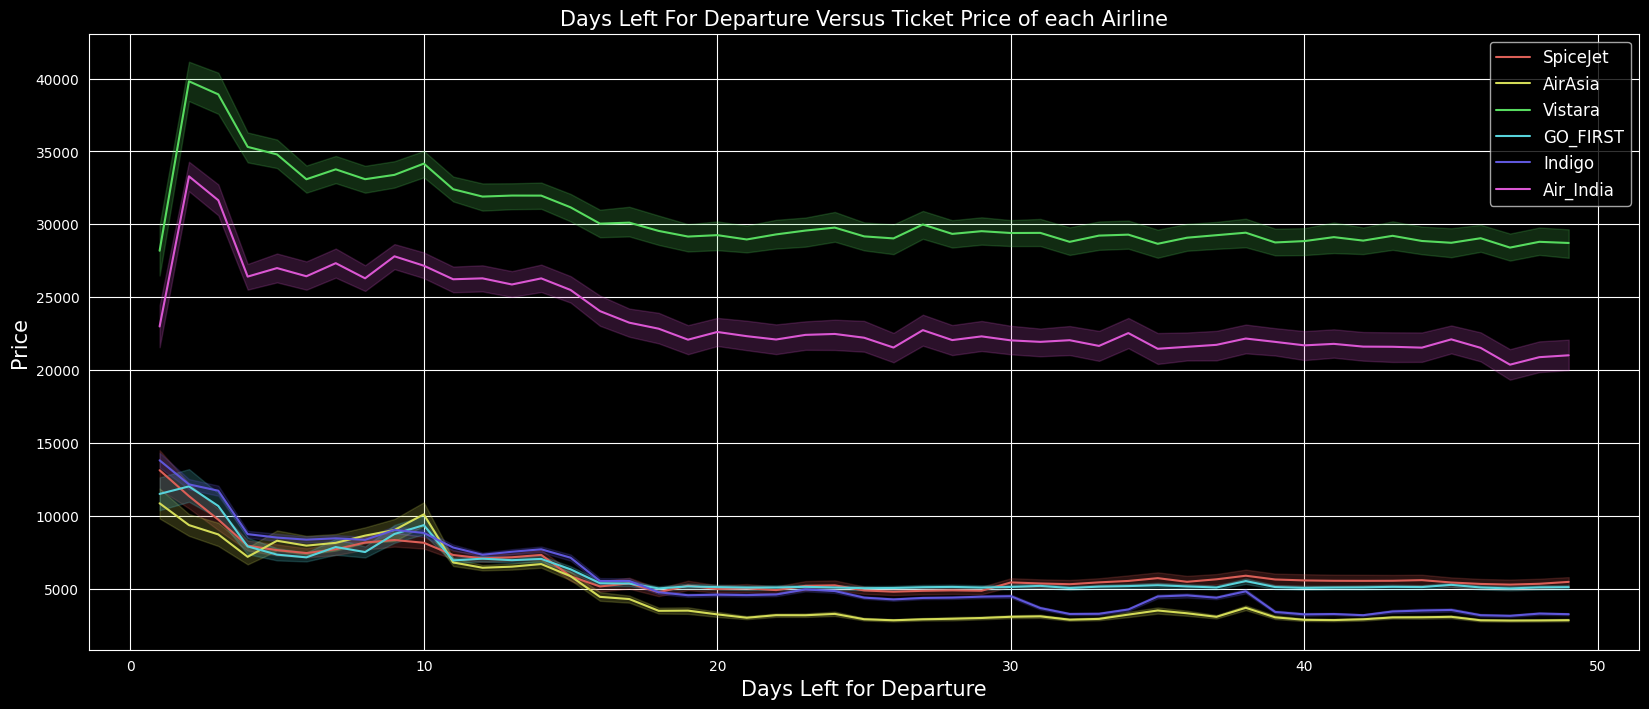

In [65]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue',hue='airline',palette='hls')
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [66]:
df.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().head(10)

,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175
5,Chennai,Bangalore,69
6,Chennai,Delhi,105
7,Chennai,Hyderabad,82
8,Chennai,Kolkata,110
9,Chennai,Mumbai,94


In [67]:
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(10)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
5,AirAsia,Chennai,Bangalore,1914.760870
6,AirAsia,Chennai,Delhi,3697.314003
7,AirAsia,Chennai,Hyderabad,2053.182540
8,AirAsia,Chennai,Kolkata,3682.338762
9,AirAsia,Chennai,Mumbai,2691.100000


In [68]:
# Creating a Back up File
df_bk=df.copy()

In [69]:
# Coverting the labels into a numeric form using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [70]:
# storing the Dependent Variables in X and Independent Variable in Y
x=df.drop(['price'],axis=1)
y=df['price']

In [71]:
# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 10), (90046, 10), (210107,), (90046,))

In [72]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [73]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [74]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

modelGBR = GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag, modelRE, modelLO]

for models in MM:

    # Fit the model with train data

    models.fit(x_train, y_train)

    # Predict the model with test data

    y_pred = models.predict(x_test)

    # Print the model name

    print('Model Name: ', models)

    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Evaluation of MAPE

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')

    # Calculate Adjusted R squared values

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = pd.concat([Results, pd.DataFrame([new_row])], ignore_index=True)

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 4630.296
Mean Squared Error (MSE): 49070241.265
Root Mean Squared Error (RMSE): 7005.015
R2_score: 0.904656
Root Mean Squared Log Error (RMSLE): 8.854
Mean Absolute Percentage Error (MAPE): 43.89 %
Adj R Square:  0.904653
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 1261.747
Mean Squared Error (MSE): 13777674.539
Root Mean Squared Error (RMSE): 3711.829
R2_score: 0.97323
Root Mean Squared Log Error (RMSLE): 8.219
Mean Absolute Percentage Error (MAPE): 8.64 %
Adj R Square:  0.973229
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 1171.541
Mean Squared Error (MSE): 8193534.392
Root Mean Squared Error (RMSE): 2862.435
R2_score: 0.98408
Root Mean Squared Log Error (RMSLE): 7.959
Mean

InvalidParameterError: The 'loss' parameter of GradientBoostingRegressor must be a str among {'squared_error', 'quantile', 'huber', 'absolute_error'}. Got 'ls' instead.

In [ ]:
# Exibir resultados finais
print(Results)

In [ ]:
models=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','KNeighborsRegressor','ExtraTreesRegressor','GradientBoostingRegressor','XGBRegressor','BaggingRegressor','Ridge Regression','Lasso Regression']
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

In [ ]:
#Trainig the model with
modelETR.fit(x_train, y_train)

# Predict the model with test data

y_pred = modelETR.predict(x_test)

In [ ]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df_bk.merge(out,left_index=True,right_index=True)

In [ ]:
result.sample(10)

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result,color='cyan')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()